# Trend Factor 
In the paper by Han Yufeng 2015, he presented an interesting idea about trend factor, which is a substitite of momentum factor. With various tests, trend factor has shown strong and persistent performance to explain the abnormal results of U.S. stock market from 1927 to 2014. The author has also shown that trend factor, similar conceptually to momentum factor, can be a better predictor to the future returns and can be implemented into a stock picking and portfolio construction system, to achieve in average above 2% per month return throughout the last 80 years stock market history. 

## Methodology
The trend factor is constructed with multiple moving averages: 1, 2, 5, 10, 50, 100, 200 days. These MAs should be then normalized, using the last day price. 



# Data Management
All the related data will be downlonad into an Excel spreadsheet named data.xlsx . The following code will download the data from Quandl, and export it to the spreadsheet under different sheet names. 

In [ ]:
import pandas as pd
import numpy as np
import Quandl
#settings
quandl_token = "AuFngLLqDpLf672K9W85"

## 1. downlonad SPDA Sector ETF data

In [22]:
t_start = "1995-1-1"
t_end = "2015-5-1"
download_tickers = ["EOD/XLB","EOD/XLE","EOD/XLF","EOD/XLI","EOD/XLK","EOD/XLP","EOD/XLU","EOD/XLV","EOD/XLY"]
tickers = ["EOD/XLB","EOD/XLE","EOD/XLF","EOD/XLI","EOD/XLK","EOD/XLP","EOD/XLU","EOD/XLV","EOD/XLY", "Gold"]

#downloading data
data = pd.DataFrame();
data_m = pd.DataFrame();
for t in download_tickers:
    print t;
    data_0 = Quandl.get(t,authtoken=quandl_token, returns="pandas", trim_start=t_start, trim_end=t_end);
    data = data.join(pd.Series(data_0["Adj_Close"], name=t), how="outer");

# download Gold data and attached to the data .
d0 = Quandl.get('BUNDESBANK/BBK01_WT5511',authtoken=quandl_token, returns="pandas", trim_start=t_start, trim_end=t_end);
data = data.join(pd.Series(d0['Value'], name='Gold')).dropna();

data.to_csv('sector.csv');
    

EOD/XLB
EOD/XLE
EOD/XLF
EOD/XLI
EOD/XLK
EOD/XLP
EOD/XLU
EOD/XLV
EOD/XLY


## 2. Downloand DJ 30

In [202]:
t_start = "1990-1-1"
t_end = "2015-4-29"
dj_tickers = ["YAHOO/MMM","YAHOO/AXP","YAHOO/AAPL","YAHOO/BA","YAHOO/CAT",
              "YAHOO/CVX","YAHOO/CSCO","YAHOO/KO","YAHOO/DD", "YAHOO/XOM",
             "YAHOO/GE", "YAHOO/HD", "YAHOO/INTC", "YAHOO/IBM",
             "YAHOO/JNJ", "YAHOO/JPM", "YAHOO/UNH", "YAHOO/MCD", "YAHOO/MRK",
             "YAHOO/MSFT", "YAHOO/NKE", "YAHOO/PFE", "YAHOO/PG", "YAHOO/TRV",
             "YAHOO/UTX", "YAHOO/VZ", "YAHOO/WMT", "YAHOO/DIS",
             "YAHOO/T", "YAHOO/ABX"]

#downloading data
dj_data = pd.DataFrame();
for t in dj_tickers:
    print t;
    dj_data_0 = Quandl.get(t,authtoken=quandl_token, returns="pandas", trim_start=t_start, trim_end=t_end);
    dj_data = dj_data.join(pd.Series(dj_data_0["Adjusted Close"], name=t), how="outer");
dj_data.to_csv('dj.csv');

YAHOO/MMM
YAHOO/AXP
YAHOO/AAPL
YAHOO/BA
YAHOO/CAT
YAHOO/CVX
YAHOO/CSCO
YAHOO/KO
YAHOO/DD
YAHOO/XOM
YAHOO/GE
YAHOO/HD
YAHOO/INTC
YAHOO/IBM
YAHOO/JNJ
YAHOO/JPM
YAHOO/UNH
YAHOO/MCD
YAHOO/MRK
YAHOO/MSFT
YAHOO/NKE
YAHOO/PFE
YAHOO/PG
YAHOO/TRV
YAHOO/UTX
YAHOO/VZ
YAHOO/WMT
YAHOO/DIS
YAHOO/T
YAHOO/ABX


# Experiment 1: Using Sector ETF to test the predictive power of trend factor

In [11]:
%pylab inline

import pandas as pd
import numpy as np
import Quandl


Populating the interactive namespace from numpy and matplotlib


Here are the functions
1. compute the moving average (MA), 
2. standardize/normalize the MA with the latest price
3. calculate beta_i, which using the standardized MA to regress the returns of the security

In [268]:
def compile_ma_data(close_data) :
    nma_daily = pd.DataFrame();
    nma_daily = nma_daily.join(pd.Series(close_data, name='close'), how='outer');
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 1)/close_data, name=
                'ma1').shift(1), how='outer') 
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 2)/close_data, name=
                'ma2').shift(1), how='outer')
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 3)/close_data, name=
                'ma3').shift(1), how='outer')
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 5)/close_data, name=
                'ma5').shift(1), how='outer')
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 10)/close_data, name=
                'ma10').shift(1), how='outer')
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 20)/close_data, name=
                'ma20').shift(1), how='outer')
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 50)/close_data, name=
                'ma50').shift(1), how='outer')
    #nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 70)/close_data, name=
    #            'ma70').shift(1), how='outer')
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 100)/close_data, name=
                'ma100').shift(1), how='outer')
    nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 200)/close_data, name=
                'ma200').shift(1), how='outer')
    #nma_daily = nma_daily.join(pd.Series(pd.stats.moments.rolling_mean(close_data, 300)/close_data, name=
    #            'ma300').shift(1), how='outer')
    return nma_daily;
    
def compile_freq_data(close_ma_data, freq) :
    nma_freq = close_ma_data.resample(freq, how='last', fill_method='bfill');
    return nma_freq;

def calc_ret(close_data) :
    ret = pd.Series(close_data['close'].pct_change(), name='ret');
    return ret;

def compile_data(close_data, freq):
    clean_data = compile_ma_data(close_data).dropna();
    freq_data = compile_freq_data(clean_data, freq);
    ret_data = calc_ret(freq_data);
    data = close_data.join(pd.DataFrame(ret_data));
    return data;

def compile_regression_data(nma_freq, reg_window, reg_avg_window) :
    ret_data = nma_freq.iloc[:, -1];
    ma_data = nma_freq.iloc[:, 1:-1];
    reg_data = pd.stats.ols.MovingOLS(ret_data, ma_data.shift(1), window_type='rolling', window=reg_window, intercept=False)
    
    beta = pd.DataFrame(reg_data.beta);
    beta_avg = pd.rolling_mean(beta, reg_avg_window);
    
    y_predict_avg = pd.DataFrame(beta_avg * ma_data).dropna().sum(1)
    
    result = pd.DataFrame({'y': pd.Series(reg_data.y, name='y'), 
            'y_fitted': pd.Series(reg_data.y_fitted,name='y_fitted'),
            'y_predict': pd.Series(reg_data.y_predict,name='y_predict'),
            'y_predict_avg': pd.Series(y_predict_avg.shift(1),name='y_predict_avg')})

    
    return reg_data, result, beta, beta_avg

In [269]:
sector_data = pd.DataFrame.from_csv('sector.csv')

In [270]:
# testing
reg_window = 20;
reg_avg_window = 1;
freq = 'W';

xlb = sector_data['EOD/XLB'];
c_xlb = compile_data(pd.DataFrame(xlb), freq);
reg_data, result, beta, beta_avg = compile_regression_data(c_xlb, reg_window, reg_avg_window)



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

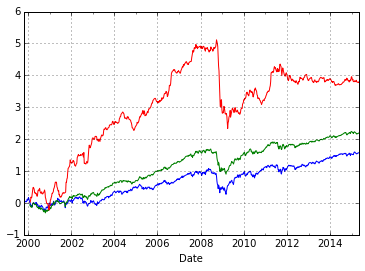

In [251]:
reg_data.y_fitted
reg_data.y.cumsum().plot()
reg_data.y_fitted.cumsum().plot()
reg_data.y_predict.cumsum().plot()
#result.y_predict_avg.cumsum().plot()

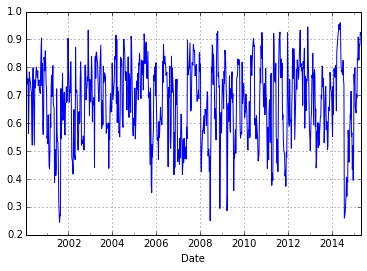

In [252]:
reg_data.r2.plot()

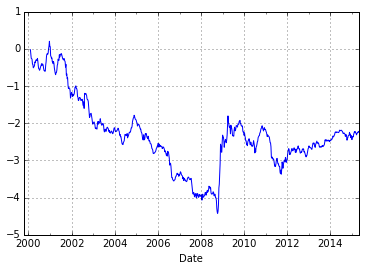

In [253]:
(reg_data.y - result.y_predict_avg).cumsum().plot()

Now, we try to test the algorithm using the following setups:
* Using 30 data points window to regress, and calculate betas.
* Try different frequency, as 'D', 'M', 'W' and etc
* Using average 5 betas to predict the future returns

Once we have done the prediction of the returns for each asset, we will long the best one (with the highest returns). Second test can be long/short portfolio 

In [271]:
def best_momentum_strategy(data, tickers,freq, reg_window, reg_avg_window) :
    y_pred_ret_data = pd.DataFrame();
    y_ret_data = pd.DataFrame();
    for t in tickers:
        print t;
        t_data = compile_data(data[t], freq).dropna();
        reg_data, result, beta, beta_avg = compile_regression_data(t_data, reg_window, reg_avg_window);
        y_pred_ret_data = y_pred_ret_data.join(pd.Series(result['y_predict_avg'], name=t), how='outer');
        y_ret_data = y_ret_data.join(pd.Series(result['y'], name=t), how='outer');
        
    max_ret_index = y_pred_ret_data.idxmax(axis=1).dropna();
    max_predict_ret = y_pred_ret_data.max(axis=1).dropna();
    min_ret_index = y_pred_ret_data.idxmin(axis=1).dropna();
    min_predict_ret = y_pred_ret_data.min(axis=1).dropna();
    y_pred_ret_data = y_pred_ret_data.join(pd.Series(max_ret_index, name='max_index'));
    y_pred_ret_data = y_pred_ret_data.join(pd.Series(max_predict_ret, name='max_predict_ret'));
    y_pred_ret_data = y_pred_ret_data.join(pd.Series(min_ret_index, name='min_index'));
    y_pred_ret_data = y_pred_ret_data.join(pd.Series(min_predict_ret, name='min_predict_ret'));
    y_pred_ret_data = y_pred_ret_data.join(pd.Series(max_predict_ret, name='long_ret'));
    y_pred_ret_data = y_pred_ret_data.join(pd.Series(min_predict_ret, name='short_ret'));

    for i in max_ret_index.index:
        y_pred_ret_data.loc[i, 'long_ret'] = y_ret_data.loc[i, y_pred_ret_data.loc[i, 'max_index']]
        y_pred_ret_data.loc[i, 'short_ret'] = y_ret_data.loc[i, y_pred_ret_data.loc[i, 'min_index']]
        #print y_data.loc[i, y_data.loc[i, 'max_index']]   
        
    return y_pred_ret_data;
    

In [272]:
reg_window = 20;
reg_avg_window = 5;
freq = 'W';

strategy_ret = best_momentum_strategy(sector_data, tickers, freq, reg_window, reg_avg_window)
s1 = strategy_ret.long_ret;
s1.cumsum().plot()
s2 = strategy_ret.short_ret;
s2.cumsum().plot()
(s1-s2).cumsum().plot()

EOD/XLB


AttributeError: 'Series' object has no attribute 'join'

# Dow Jones 30 Stocks Testing

In [254]:
dj_data = pd.DataFrame.from_csv('dj.csv')

In [255]:
reg_window = 40;
reg_avg_window = 5;
freq = 'M';

strategy_ret = best_momentum_strategy(dj_data, dj_tickers, freq, reg_window, reg_avg_window)
s1 = strategy_ret.long_ret;
s1.cumsum().plot()
s2 = strategy_ret.short_ret;
s2.cumsum().plot()
(s1-s2).cumsum().plot()

YAHOO/MMM


AttributeError: 'Series' object has no attribute 'join'

In [1319]:
su_tickers = ["YAHOO/INDEX_GDAXI"];
su_data = pd.DataFrame();
for t in su_tickers:
    print t;
    su_data_0 = Quandl.get(t,authtoken=quandl_token, returns="pandas", trim_start=t_start, trim_end=t_end);
    su_data = su_data.join(pd.Series(su_data_0["Adjusted Close"], name=t), how="outer");
    

YAHOO/INDEX_GDAXI


In [1386]:
dj_data1 = dj_data

In [1388]:
dj_data1 = dj_data.join(su_data).dropna();
dj_tickers1 = dj_tickers + su_tickes

YAHOO/MMM
YAHOO/AXP
YAHOO/AAPL
YAHOO/BA
YAHOO/CAT
YAHOO/CVX
YAHOO/CSCO
YAHOO/KO
YAHOO/DD
YAHOO/XOM
YAHOO/GE
YAHOO/HD
YAHOO/INTC
YAHOO/IBM
YAHOO/JNJ
YAHOO/JPM
YAHOO/UNH
YAHOO/MCD
YAHOO/MRK
YAHOO/MSFT
YAHOO/NKE
YAHOO/PFE
YAHOO/PG
YAHOO/TRV
YAHOO/UTX
YAHOO/VZ
YAHOO/WMT
YAHOO/DIS
YAHOO/T
YAHOO/ABX


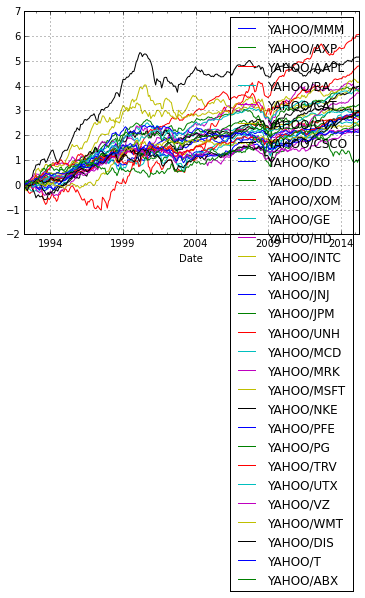

In [1409]:
reg_window = 30;
reg_avg_window = 1;
freq = 'M';

strategy_ret = best_momentum_strategy(sector_data, dj_tickers, freq, reg_window, reg_avg_window)
s1 = strategy_ret.long_ret;
s1.cumsum().plot()
s2 = strategy_ret.short_ret;
s2.cumsum().plot()
(s1-s2).cumsum().plot()


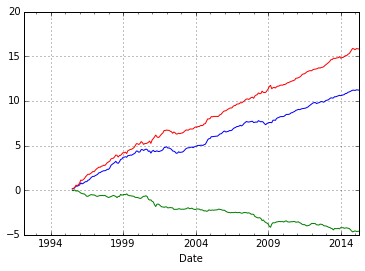

In [1410]:
s1 = y_pred_ret_data.long_ret;
s1.cumsum().plot()
s2 = y_pred_ret_data.short_ret;
s2.cumsum().plot()
(s1-s2).cumsum().plot()

In [1411]:
y_pred_ret_data.max_index.tail(200)

Date
1998-09-30     YAHOO/WMT
1998-10-31     YAHOO/ABX
1998-11-30     YAHOO/JPM
1998-12-31     YAHOO/DIS
1999-01-31    YAHOO/AAPL
1999-02-28     YAHOO/DIS
1999-03-31     YAHOO/TRV
1999-04-30     YAHOO/PFE
1999-05-31    YAHOO/AAPL
1999-06-30     YAHOO/TRV
1999-07-31     YAHOO/WMT
1999-08-31    YAHOO/CSCO
1999-09-30    YAHOO/MSFT
1999-10-31      YAHOO/HD
1999-11-30     YAHOO/JPM
...
2014-02-28     YAHOO/DIS
2014-03-31      YAHOO/HD
2014-04-30     YAHOO/XOM
2014-05-31    YAHOO/AAPL
2014-06-30      YAHOO/BA
2014-07-31    YAHOO/INTC
2014-08-31    YAHOO/INTC
2014-09-30     YAHOO/UNH
2014-10-31     YAHOO/NKE
2014-11-30     YAHOO/JNJ
2014-12-31    YAHOO/AAPL
2015-01-31     YAHOO/CVX
2015-02-28     YAHOO/ABX
2015-03-31    YAHOO/MSFT
2015-04-30      YAHOO/BA
Freq: M, Name: max_index, Length: 200

# Global Investment Test
using NASDAQ, SPY, Chinese stock, Commodity (GLD, OIL, and others), together with currency and bond. 

In [1211]:
#settings
quandl_token = "AuFngLLqDpLf672K9W85"
t_start = "2005-1-1"
t_end = "2015-4-1"

In [1214]:
data1 = Quandl.get('GOOG/VIE_EX16',authtoken=quandl_token, returns="pandas", trim_start=t_start, trim_end=t_end);
data2 = Quandl.get('YAHOO/INDEX_SPY',authtoken=quandl_token, returns="pandas", trim_start=t_start, trim_end=t_end);


In [1213]:
data1

,Open,High,Low,Close,Volume
Date,,,,,
2005-11-21,34.84,34.84,34.84,34.84,0
2005-11-22,34.94,34.94,34.94,34.94,70
2005-11-23,35.14,35.14,35.14,35.14,0
2005-11-24,35.12,35.12,35.02,35.02,20000
2005-11-25,35.13,35.13,35.13,35.13,0
2005-11-28,35.00,35.00,35.00,35.00,0
2005-11-29,35.09,35.09,35.09,35.09,0
2005-11-30,34.97,34.97,34.97,34.97,0
2005-12-01,35.17,35.17,35.17,35.17,45
